In [1]:
dataset_filename = 'diabetes.csv'
print(dataset_filename)

diabetes.csv


In [2]:
import pandas as pd
from pandas import read_csv

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = read_csv(dataset_filename, delimiter=',', names=columns)
print(data.shape)

(768, 9)


In [3]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


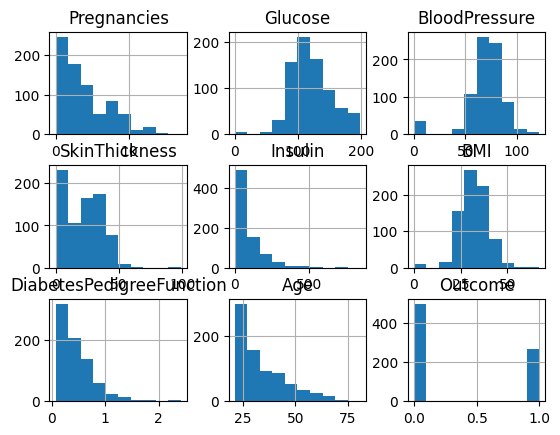

In [6]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

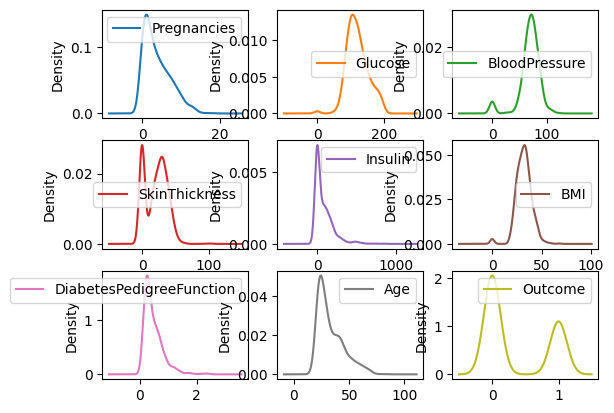

In [7]:
# data.plot(kind='density')  # Bad
data.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)
plt.show()

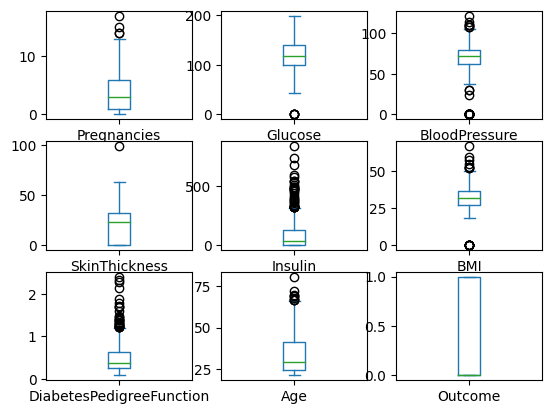

In [8]:
data.plot(kind='box', subplots=True, layout=(3, 3), sharex=False)
plt.show()

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


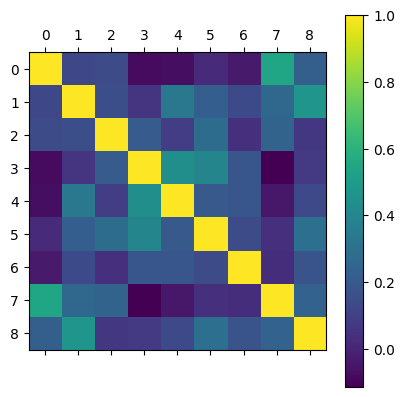

In [10]:
plt.matshow(data.corr())
plt.colorbar()
plt.show()

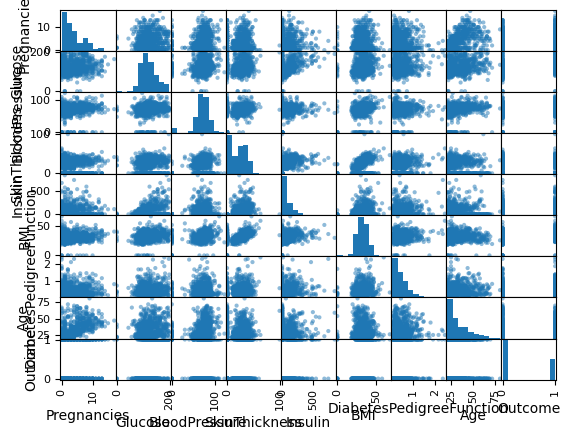

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
plt.show()

In [12]:
X = data.values[:, :8]
Y = data['Outcome']

## Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled_minmax = scaler.fit_transform(X)

print(X)
print(X_rescaled_minmax)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]


## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_rescaled_standard = scaler.fit_transform(X)

print(X)
print(X_rescaled_standard)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


## NaN preprocessing should be here (from sklearn)

## Feature selection

Statistical analysis (model-agnostic)

In [15]:
from sklearn.feature_selection import SelectKBest, chi2 # chi2 can be non-sufficient/non-compatible to some data

feature_selector = SelectKBest(k=5, score_func=chi2)
test = feature_selector.fit(X, Y)

print(test.scores_) # highest score == best

features = test.transform(X)
print(X[0: 3, :])
print(features[0: 3, :])

[ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
[[  6.  148.    0.   33.6  50. ]
 [  1.   85.    0.   26.6  31. ]
 [  8.  183.    0.   23.3  32. ]]


RFE - recursive feature elimination (model-based)

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) # Max iter so it doesnt complain about failing to converge
rfe = RFE(model, n_features_to_select=5)
test = rfe.fit(X, Y)

print(test.support_)
print(test.ranking_)

features = test.transform(X)
print(X[0: 3, :])
print(features[0: 3, :])

[ True  True False False False  True  True  True]
[1 1 2 4 3 1 1 1]
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
[[  6.    148.     33.6     0.627  50.   ]
 [  1.     85.     26.6     0.351  31.   ]
 [  8.    183.     23.3     0.672  32.   ]]


PCA - principal component analysis

## Models